In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings("ignore")

### Summary

In [66]:
df = pd.read_csv('applications data.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  int64 
 1   date         1000000 non-null  int64 
 2   ssn          1000000 non-null  int64 
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  int64 
 7   dob          1000000 non-null  int64 
 8   homephone    1000000 non-null  int64 
 9   fraud_label  1000000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 76.3+ MB


In [68]:
df = df.astype('object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  object
 1   date         1000000 non-null  object
 2   ssn          1000000 non-null  object
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  object
 7   dob          1000000 non-null  object
 8   homephone    1000000 non-null  object
 9   fraud_label  1000000 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


In [70]:
df.shape

(1000000, 10)

In [71]:
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [72]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df['dob'] = pd.to_datetime(df['dob'],format='%Y%m%d')

In [73]:
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  object        
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  datetime64[ns]
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 76.3+ MB


In [75]:
min(df['date'])

Timestamp('2016-01-01 00:00:00')

In [76]:
max(df['date'])

Timestamp('2016-12-31 00:00:00')

In [77]:
df.describe()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.0,1000000,1000000.0,1000000,1000000,1000000,1000000.0,1000000,1.000000e+06,1000000.0
unique,1000000.0,365,835819.0,78136,177001,828774,26370.0,42673,2.824400e+04,2.0
top,1000000.0,2016-08-16 00:00:00,999999999.0,EAMSTRMT,ERJSAXA,123 MAIN ST,68138.0,1907-06-26 00:00:00,1.000000e+10,0.0
freq,1.0,2877,16935.0,12658,8580,1079,823.0,126568,7.851200e+04,985607.0
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN
last,NaN,2016-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-10-31 00:00:00,NaN,NaN


In [78]:
category = ['record','ssn','firstname','lastname','address','zip5','homephone', 'fraud_label']
date_time = ['date','dob']

In [87]:
stat_of_cate = []
for col in category:
    stat_of_cate.append((col,
                         'categorical',
                         df[col].count(),
                         df[col].nunique(),
                         (1 - (df[col].isnull().sum()*100/df.shape[0]))*100,
                         df[col].loc[df[col]==0].count(),
                         df[col].value_counts().index[0]
                         ))

In [88]:
stats_df = pd.DataFrame(stat_of_cate, 
                        columns=['Feature', 'Data Type', '# of Records','Uniq_val', 
                                 '% populated', '# of Zeros', 'Most Common Value'])

In [89]:
stats_df

,Feature,Data Type,# of Records,Uniq_val,% populated,# of Zeros,Most Common Value
0,record,categorical,1000000,1000000,100.0,0,1000000
1,ssn,categorical,1000000,835819,100.0,0,999999999
2,firstname,categorical,1000000,78136,100.0,0,EAMSTRMT
3,lastname,categorical,1000000,177001,100.0,0,ERJSAXA
4,address,categorical,1000000,828774,100.0,0,123 MAIN ST
5,zip5,categorical,1000000,26370,100.0,0,68138
6,homephone,categorical,1000000,28244,100.0,0,9999999999
7,fraud_label,categorical,1000000,2,100.0,985607,0


In [90]:
stats_df['Most Common Value'][0] = 'N/A'

In [91]:
stats_df

,Feature,Data Type,# of Records,Uniq_val,% populated,# of Zeros,Most Common Value
0,record,categorical,1000000,1000000,100.0,0,N/A
1,ssn,categorical,1000000,835819,100.0,0,999999999
2,firstname,categorical,1000000,78136,100.0,0,EAMSTRMT
3,lastname,categorical,1000000,177001,100.0,0,ERJSAXA
4,address,categorical,1000000,828774,100.0,0,123 MAIN ST
5,zip5,categorical,1000000,26370,100.0,0,68138
6,homephone,categorical,1000000,28244,100.0,0,9999999999
7,fraud_label,categorical,1000000,2,100.0,985607,0


In [93]:
#stats_df.to_csv('summary table.csv')

In [94]:
stat_of_date = []
for col in date_time:
    stat_of_date.append((col,
                         'date/time',
                         df[col].count(),
                         (1 - (df[col].isnull().sum()*100/df.shape[0]))*100,
                         df[col].loc[df[col]==0].count(),
                         df[col].min(),
                         df[col].max(),
                         df[col].value_counts().index[0]
                         ))

In [95]:
stats_df1 = pd.DataFrame(stat_of_date, 
                        columns=['Feature', 'Data Type', '# of Records', 
                                 '% populated', '# of Zeros', 'Min', 'Max','Most Common Value'])

In [96]:
stats_df1

,Feature,Data Type,# of Records,% populated,# of Zeros,Min,Max,Most Common Value
0,date,date/time,1000000,100.0,0,2016-01-01,2016-12-31,2016-08-16
1,dob,date/time,1000000,100.0,0,1900-01-01,2016-10-31,1907-06-26


In [97]:
#stats_df1.to_csv('date_time summary.csv')

### Data Field Exploration

In [274]:
def dist_plot(field):
    temp= pd.DataFrame(df[field].value_counts())
    temp.columns = ['count']
    
    plt.figure(figsize = (15,10))
    y = list(temp[:15].values)
    temp[:15].plot(kind = 'bar')
    plt.xticks(rotation=60)
    plt.yscale('log')
    plt.title('Top 15 Frequent '+str(field), fontweight = 'bold')
    plt.xlabel(field,fontweight = 'bold',fontsize = 10)
    plt.ylabel('Count',fontweight = 'bold',fontsize = 10)
    for index, value in enumerate(y):
        plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', fontsize = 8)

**Date**

In [259]:
date_cnt = df.groupby('date')['record'].count()
date_cnt

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
              ... 
2016-12-27    2718
2016-12-28    2832
2016-12-29    2767
2016-12-30    2684
2016-12-31    2814
Name: record, Length: 365, dtype: int64

Text(0, 0.5, 'Count')

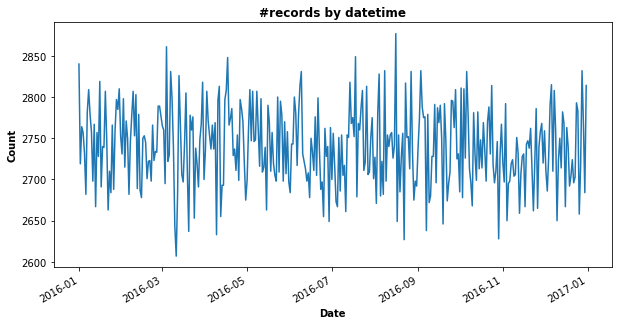

In [267]:
date_cnt.plot(kind = 'line')
plt.title('#records by datetime', fontweight = 'bold')
plt.xlabel('Date',fontweight = 'bold',fontsize = 10)
plt.ylabel('Count',fontweight = 'bold',fontsize = 10)

Text(0, 0.5, 'Count')

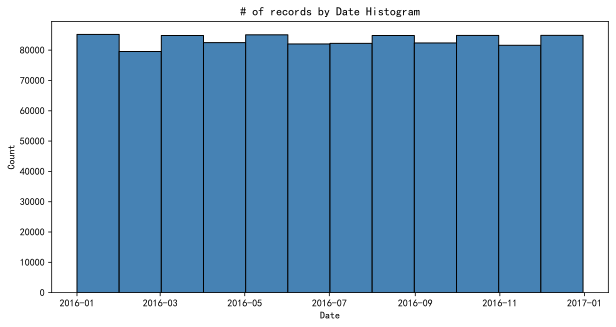

In [328]:
plt.hist(x=df['date'],bins=12, color="steelblue", edgecolor = 'black')
plt.title('# of records by Date Histogram', fontweight = 'bold')
plt.xlabel('Date',fontweight = 'bold',fontsize = 10)
plt.ylabel('Count',fontweight = 'bold',fontsize = 10)

**SSN**

<Figure size 1080x720 with 0 Axes>

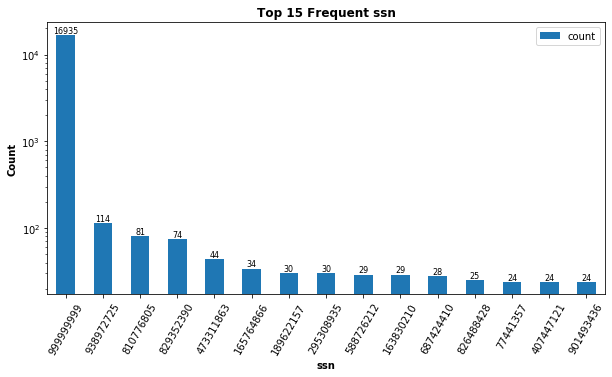

In [276]:
dist_plot('ssn')

In [277]:
ssn_cnt = pd.DataFrame(df['ssn'].value_counts())

In [278]:
top_ssn = df.loc[df['ssn'].isin(ssn_cnt.index[:15])]

Text(0.5, 1.0, 'Top 15 SSN by Fraud Label')

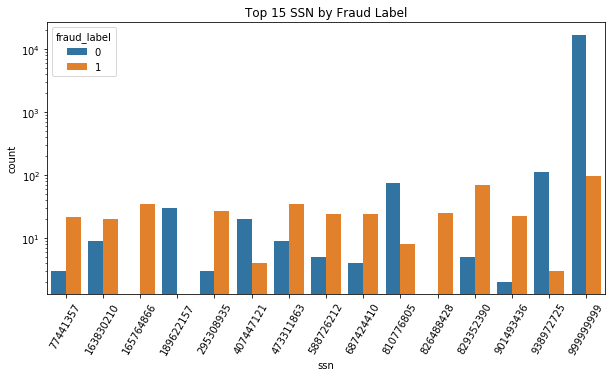

In [279]:
sns.countplot(x='ssn', data = top_ssn, hue='fraud_label')
plt.yscale('log')
plt.xticks(rotation=60)
plt.title('Top 15 SSN by Fraud Label')

**First Name**

<Figure size 1080x720 with 0 Axes>

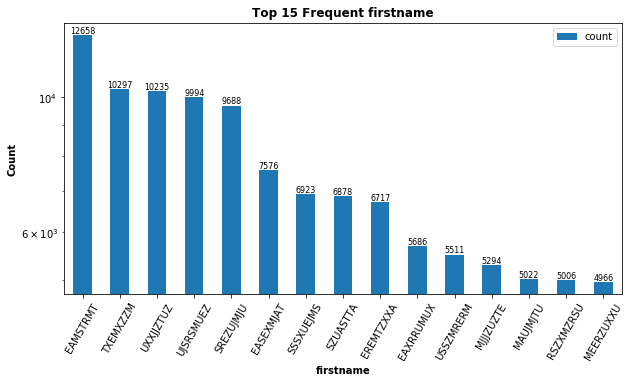

In [275]:
dist_plot('firstname')

**Last Name**

<Figure size 1080x720 with 0 Axes>

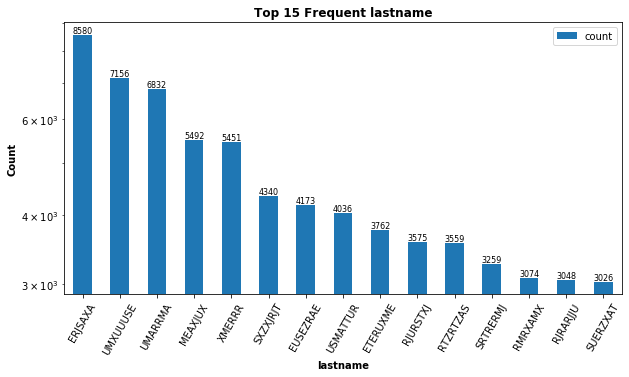

In [281]:
dist_plot('lastname')

**Full Name**

In [284]:
df['fullname'] = df['firstname']+ ' '+ df['lastname']

<Figure size 1080x720 with 0 Axes>

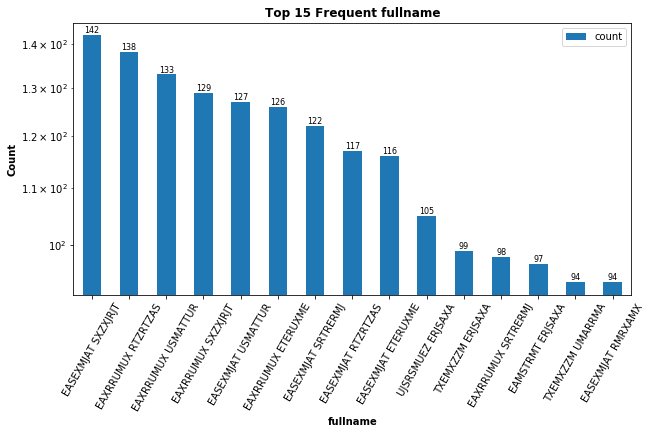

In [285]:
dist_plot('fullname')

**Address**

<Figure size 1080x720 with 0 Axes>

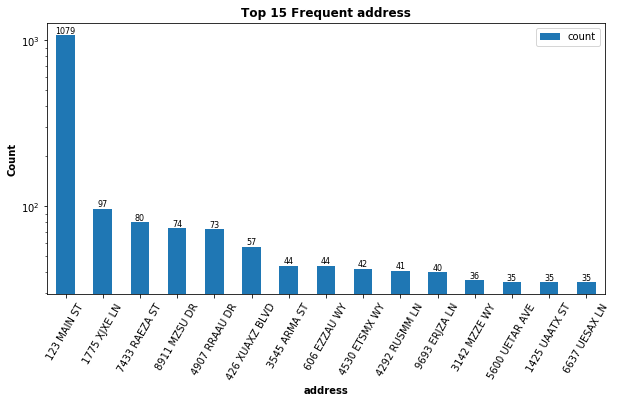

In [287]:
dist_plot('address')

**Zipcode**

<Figure size 1080x720 with 0 Axes>

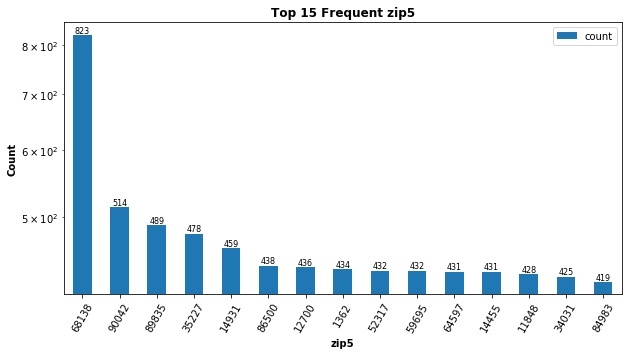

In [288]:
dist_plot('zip5')

In [298]:
df['zip5'] = df['zip5'].astype(str)
df['full address'] = df['address'] + ' '+ df['zip5']

<Figure size 1080x720 with 0 Axes>

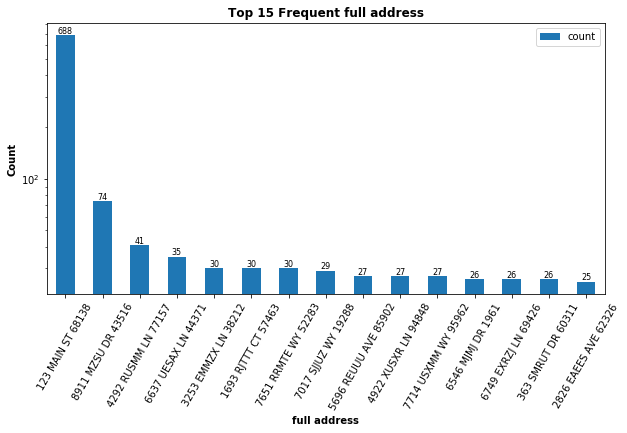

In [299]:
dist_plot('full address')

**Phone**

<Figure size 1080x720 with 0 Axes>

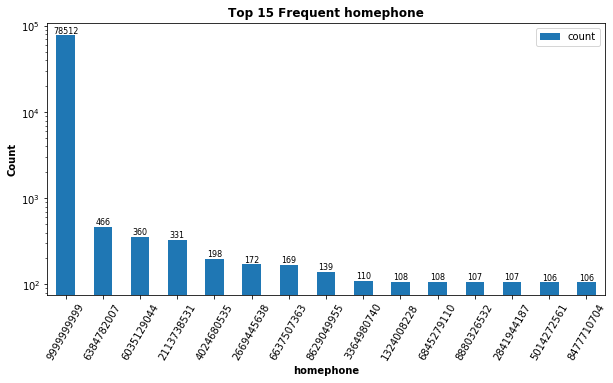

In [300]:
dist_plot('homephone')

**Date of birth**

Text(0, 0.5, 'Count')

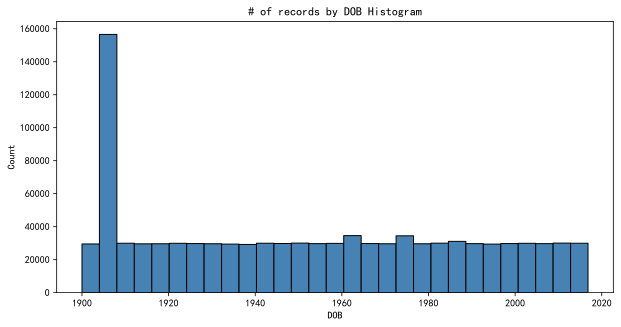

In [325]:
plt.hist(x=df['dob'],bins=29, color="steelblue", edgecolor="black")
plt.title('# of records by DOB Histogram', fontweight = 'bold')
plt.xlabel('DOB',fontweight = 'bold',fontsize = 10)
plt.ylabel('Count',fontweight = 'bold',fontsize = 10)

**Fraud Label**

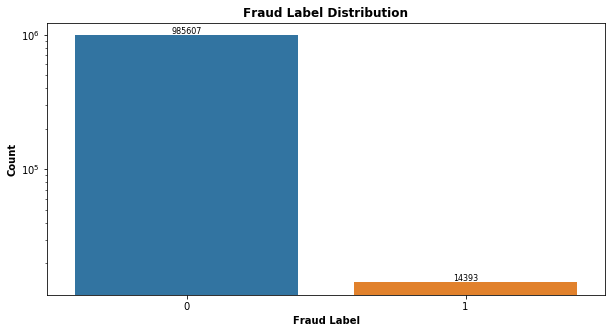

In [305]:
y = list(df['fraud_label'].value_counts().values)
sns.countplot(x = 'fraud_label', data = df)
plt.yscale('log')
plt.title('Fraud Label Distribution', fontweight = 'bold')
plt.xlabel('Fraud Label',fontweight = 'bold',fontsize = 10)
plt.ylabel('Count',fontweight = 'bold',fontsize = 10)
for index, value in enumerate(y):
    plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', fontsize = 8)